In [115]:
#imports
import cv2
from imutils import paths
from matplotlib import pyplot as plt
import helper_functions as helper
import numpy as np
import math


In [49]:
#Load and rotate/resize all images in specified directory into list_images

path   ='data/images/bubbly'
resize = 0
    
image_path = list(paths.list_images(path))    # stores all image loactions
list_images = []                                    

for _, j in enumerate(image_path):
    image = cv2.imread(j)
    image = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
    if resize == 1:
        image = cv2.resize(image, (int(image.shape[1] / 4), int(image.shape[0] / 4)))
        image = cv2.rotate(image, cv2.ROTATE_90)
    list_images.append(image)

In [314]:
#Parameters
strip_size = 5             # Width of strip in pixels
frames_number = 300         # number of frames used
alternate_frames = 1        # value of 1 uses all frames , 2 skips 1 frame
strip_x_location = 250      # Horizontal loaction of strip start in pixels
output_frame_length = 1000  # Size of Output frame in pixels

start_delay = math.ceil(strip_x_location/strip_size)                    #time taken to form a full output frame
output_frame_strips = math.ceil(output_frame_length/strip_size)         #Number of strips required to make one output frame

print("Each output frame is a composite of ",output_frame_strips,"frames")
print("Inital delay of ",start_delay,"frames to form a full output image")

Each output frame is a composite of  200 frames
Inital delay of  50 frames to form a full output image


In [298]:
#final_frame = list_images[strips_number-start_delay]
#disp = helper.dispImg(final_frame,"Last frame used")

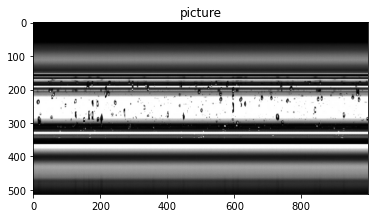

(512, 1000, 3)


In [321]:
output_frames = []

img_out = list_images[0][:, strip_x_location:strip_x_location +strip_size]

for i in range(1,frames_number,alternate_frames):

    if(len(img_out[0]) == output_frame_length):         # When desired output length is reached, start removing tyhe first strip
        output_frames.append(img_out)
        img_out = img_out[:,strip_size:]

    strip = list_images[i][:,strip_x_location:strip_x_location + strip_size]
    img_out = np.concatenate((img_out,strip) , axis=1)


disp = helper.dispImg(img_out)
print(img_out.shape)

In [326]:
# Labelling frames
len(output_frames)
filename = 'data/images/processed/bubbly/bubbly_'+str(1)+'.png'
filename

'data/images/processed/bubbly/bubbly_1.png'

In [328]:
# Saving frames 
for i in range(0,len(output_frames)):
    filename = 'data/images/processed/bubbly/bubbly_'+str(i)+'.png'
    cv2.imwrite(filename,output_frames[i])

In [334]:
# Convert to video just for fun
fps = 30
size = (output_frame_length,512)

out = cv2.VideoWriter('project.avi',cv2.VideoWriter_fourcc(*'DIVX'), fps, size)
 
for i in range(len(output_frames)):
    out.write(output_frames[i])
out.release()